------------------
# <font color = red> <p style='text-align: center;'> IMDb Movie Visualization Mini Project </p></font>
------------------

## <font color = 'purple'>Problem Statement </font>
--------------------------
We have the data for the 100 top-rated movies from the famous movie database IMDb from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online.

Our objective for this mini-project is to try to find some interesting insights into these movies and their voters, using exploratory Data Analysis.

In [6]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the required libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import plotly
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

# Displaying Maximum Number of Columns & Rows
# -------------------------------------------
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

----------------------------------------------------
----------------------------------------------------

##  Task 1: Reading the data


- ### Subtask 1.1: Read the Movies Data.

Reading the movies data file provided and store it in a dataframe `movies`.

In [7]:
# Read the csv file using 'read_csv'. Please write your dataset location here.
movies = pd.read_csv('Movie+Assignment+Data.csv')
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,93.0,128,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,69.0,118,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,81.0,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,96.0,137,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA



- ###  Subtask 1.2: Inspect the Dataframe

Inspecting the dataframe for dimensions, null-values, and summary of different numeric columns.

In [8]:
# Check the number of rows and columns in the dataframe
print("Number of Rows in the Dataset - ",movies.shape[0])
print("Number of Variables/Columns in the Dataset - ",movies.shape[1])

Number of Rows in the Dataset -  100
Number of Variables/Columns in the Dataset -  62


In [9]:
# Check the column-wise info of the dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [10]:
# Check the summary for the numeric columns 
movies.describe().round(2)

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.00,1.000000e+02,1.000000e+02,100.00,99.00,98.00,100.00,95.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,2012.82,7.838400e+07,1.468679e+08,13407.27,7377.30,3002.15,7.88,78.25,126.42,73212.16,92404.17,125762.23,76715.28,27841.45,10171.75,4330.11,2477.07,1711.57,4084.35,271446.18,64468.86,1769.05,1318.95,435.66,165863.77,128473.14,35739.71,124561.10,103437.92,19371.54,24170.16,19653.26,4093.53,624.37,54096.74,188245.68,7.85,7.91,8.21,8.17,8.21,8.01,8.01,7.98,7.73,7.72,7.78,7.65,7.62,7.77,7.27,7.96,7.79
std,1.92,7.445295e+07,1.454004e+08,10649.04,13471.57,6940.30,0.25,9.12,19.05,82669.59,75666.92,62162.75,32586.36,12883.91,5480.91,2713.61,1768.17,1318.63,3489.78,167658.02,39117.95,1324.52,1040.96,366.50,103522.93,83188.73,23092.04,72089.25,61116.37,11324.68,12841.70,10669.04,2187.96,133.24,32115.29,106902.26,0.26,0.30,0.31,0.36,0.38,0.27,0.28,0.32,0.25,0.26,0.28,0.21,0.21,0.30,0.36,0.23,0.26
min,2010.00,3.000000e+06,2.238380e+05,39.00,12.00,0.00,7.50,62.00,91.00,6420.00,7321.00,11668.00,8558.00,3370.00,1162.00,456.00,227.00,158.00,293.00,22441.00,9552.00,121.00,95.00,20.00,15959.00,10150.00,4370.00,12174.00,9280.00,2682.00,1899.00,1496.00,355.00,198.00,3678.00,19009.00,7.40,7.30,7.50,7.40,7.20,7.60,7.60,7.30,7.30,7.20,7.20,7.10,7.10,7.00,6.40,7.50,7.30
25%,2011.00,1.575000e+07,4.199752e+07,1000.00,580.00,319.75,7.70,72.00,114.75,30587.00,47098.25,83207.50,54934.50,17834.50,6026.00,2293.50,1172.75,761.75,1532.75,171936.25,35188.75,756.25,579.00,159.75,109797.75,77537.75,17637.75,78866.25,64930.25,12030.50,15288.75,12154.75,2492.75,545.00,33328.75,121863.50,7.68,7.70,8.00,7.90,7.98,7.80,7.80,7.70,7.60,7.50,7.60,7.50,7.48,7.50,7.10,7.80,7.60
50%,2013.00,4.225000e+07,1.070266e+08,13000.00,1000.00,626.50,7.80,78.00,124.00,54900.50,71376.00,117405.50,76862.00,27072.00,9123.00,3801.00,1950.00,1320.00,2933.00,238199.50,58539.50,1420.00,998.00,325.50,139321.50,111362.00,32639.50,111317.50,94010.50,17763.00,21869.50,17782.00,3771.50,639.50,48560.00,169132.00,7.80,7.90,8.20,8.15,8.30,8.00,8.00,8.00,7.70,7.70,7.80,7.65,7.60,7.80,7.30,7.95,7.75
75%,2014.00,1.500000e+08,2.107548e+08,20000.00,11000.00,1000.00,8.10,83.50,136.25,80639.00,115240.25,166742.50,100789.00,37561.75,13008.50,5571.00,3309.50,2334.50,5296.00,338326.50,82355.00,2478.75,1790.75,660.00,212788.25,160442.00,47301.00,158760.75,135668.75,24859.50,30043.00,24780.00,5342.25,727.00,70167.00,239628.25,8.00,8.10,8.40,8.40,8.50,8.12,8.10,8.20,7.90,7.90,8.00,7.80,7.80,7.93,7.50,8.10,7.93
max,2016.00,2.600000e+08,9.366622e+08,35000.00,96000.00,46000.00,8.80,100.00,180.00,584839.00,485218.00,304457.00,162604.00,67579.00,27957.00,12286.00,7868.00,5751.00,15768.00,1044318.00,239796.00,5735.00,4596.00,1910.00,655187.00,512411.00,136770.00,472680.00,392845.00,73555.00,79634.00,65508.00,12795.00,885.00,212524.00,707266.00,8.80,8.70,9.10,9.10,9.00,9.00,9.00,8.80,8.70,8.70,8.50,8.10,8.10,8.50,8.20,8.70,8.80


In [11]:
# Looking at the Data
# -------------------
# The size of the dataset is extremely small and has suprisingly large number of columns/variables.
# We also observe a huge number of numerical variables as compared to the categorical/string columns.

<br><br>

## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 


-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. <br>Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [12]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'
movies['Gross'] = movies['Gross']/1000000
movies['budget'] = movies['budget']/1000000
print("----------------------------------")
print(movies['Gross'].head())
print("----------------------------------")
print(movies['budget'].head())
print("----------------------------------")

----------------------------------
0    151.101803
1    341.268248
2     51.738905
3    100.546139
4     47.695371
Name: Gross, dtype: float64
----------------------------------
0     30.0
1    150.0
2     12.0
3     47.0
4      9.0
Name: budget, dtype: float64
----------------------------------


-  ###  Subtask 2.2: Let's Talk Profit!

- 1. Creating a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
- 2. Sorting the dataframe using the `profit` column as reference.
- 3. Extracting the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
- 4. Plotting a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
- 5. Extracting the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [13]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column
movies['Profit'] = movies['Gross'] - movies['budget']
movies[['Gross','budget','Profit']].head()

,Gross,budget,Profit
0,151.101803,30.0,121.101803
1,341.268248,150.0,191.268248
2,51.738905,12.0,39.738905
3,100.546139,47.0,53.546139
4,47.695371,9.0,38.695371


In [14]:
# Sorting the dataframe in descending order of profit
movies.sort_values(by= 'Profit', ascending = False, inplace=True, ignore_index=True)
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
0,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,Action,Adventure,Fantasy,81.0,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
1,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,8.1,Action,Sci-Fi,NaN,69.0,143,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,691783,151617,4953,3767,1150,432999,343012,85465,295318,247617,43303,54282,44183,9138,842,145826,423958,8.0,8.2,8.2,8.2,8.5,8.1,8.1,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
2,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,8.0,Action,Adventure,Comedy,65.0,108,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,3601,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
3,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,7.6,Action,Adventure,Mystery,76.0,146,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,307237,115421,3650,1956,1664,218884,148652,67934,140683,109976,28735,27789,21545,5771,693,68521,221430,7.4,8.1,8.0,7.7,8.5,7.8,7.6,8.2,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
4,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,8.3,Animation,Adventure,Comedy,92.0,103,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,389014,98386,3202,2405,776,260519,199962,58366,169886,140253,27658,32457,26171,5806,769,105490,267692,8.3,8.3,8.2,8.3,8.0,8.4,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497


In [15]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)
top10 = movies.head(10)
top10

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
0,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,Action,Adventure,Fantasy,81.0,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
1,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,8.1,Action,Sci-Fi,NaN,69.0,143,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,691783,151617,4953,3767,1150,432999,343012,85465,295318,247617,43303,54282,44183,9138,842,145826,423958,8.0,8.2,8.2,8.2,8.5,8.1,8.1,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
2,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,8.0,Action,Adventure,Comedy,65.0,108,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,3601,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
3,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,7.6,Action,Adventure,Mystery,76.0,146,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,307237,115421,3650,1956,1664,218884,148652,67934,140683,109976,28735,27789,21545,5771,693,68521,221430,7.4,8.1,8.0,7.7,8.5,7.8,7.6,8.2,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
4,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,8.3,Animation,Adventure,Comedy,92.0,103,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,389014,98386,3202,2405,776,260519,199962,58366,169886,140253,27658,32457,26171,5806,769,105490,267692,8.3,8.3,8.2,8.3,8.0,8.4,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
5,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,8.4,Action,Thriller,NaN,78.0,164,380589,341965,281426,134959,50406,20106,9589,5713,4073,11988,842343,143070,4726,4023,672,509635,425041,79826,348324,299862,43434,55689,46968,7741,840,160533,501687,8.5,8.4,8.6,8.5,8.6,8.7,8.7,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642
6,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,7.8,Animation,Action,Adventure,83.0,100,41269,50795,83773,55181,21793,8596,3680,2053,1466,2918,180122,37351,1887,1464,414,111043,89180,20677,77271,65191,11020,13346,11079,2032,579,42963,114308,7.8,7.7,8.2,8.2,7.9,7.9,8.0,7.7,7.6,7.6,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
7,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
8,Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,7.7,Animation,Adventure,Comedy,72.0,124,56474,66298,136943,102534,35207,11448,4000,1862,1024,1825,251408,91545,2241,

-----------------
### Looking at the Graphical Form of Data

-----------------

In [19]:
movies.columns

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country', 'Profit'],
      dtype='object')

<Figure size 504x504 with 0 Axes>

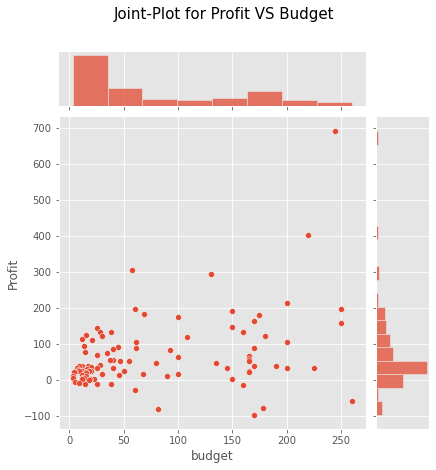

In [29]:
# Scatter Plot between columns - Budget & Profit
# ----------------------------------------------
plt.figure(figsize=(7,7))
sns.jointplot(x="budget", y="Profit", data=movies)
plt.suptitle('Joint-Plot for Profit VS Budget', x=0.5, y=1.08, fontsize=15)
plt.show()

#### General Observations
- **There is a slightly proportional trend, as most movies with higher budget have positive profits.**
- **Most of the movies have generated a positive profit.**
- **Quite a few movies with Negative Profits are present in the plot.**
- **Most of the movies have a very low gross value, i.e. in the range of (0 to 50 Million Dollars).**
- **Most of the movies have a positive Profit in the range of (0 to 200 Million Dollars)**

#### Eccentric Observations
- **There are some movies that have a very high budget range, but are still producing negative profits.**

The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. 

**What can be the reason behind this?** 

Lets have a closer look at this by finding the movies with negative profit.

In [15]:
#Find the movies with negative profit
negative_profits = movies[movies['Profit']<0]

# Printing the first 5 rows of negative_profits in increasing order of profits
negative_profits.sort_values(by='Profit').head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
99,Hugo,2011,170.0,73.820094,ChloÃ« Grace Moretz,Christopher Lee,Ray Winstone,17000,16000.0,1000.0,...,7.4,7.5,7.5,7.6,7.4,7.7,7.5,PG,USA,-96.179906
98,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848
97,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
96,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
95,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730


### Subtask 2.3: The General Audience and the Critics

Here we will try to find out the highest rated movies which have been liked by critics and audiences alike.

We see that there is a column called `MetaCritic` in the dataset. 
It is well known that IMDb average rating is determined through scores given by the top-rated critics.

For ratings we have the `IMDb_rating` variable. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

We will now do the following tasks - 
- 1)  We see that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10, so we will first convert the `MetaCritic` column to a scale of 10.

- 2) Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, we will need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference between the `IMDb_rating` and `Metacritic` columns is less than 0.5.
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [16]:
# Change the scale of MetaCritic
# movies.MetaCritic.head(10)
movies['MetaCritic'] = movies['MetaCritic']/10
movies['MetaCritic'].head()

0    8.1
1    6.9
2    6.5
3    7.6
4    9.2
Name: MetaCritic, dtype: float64

In [17]:
# Find the average ratings
movies['Avg_rating'] = (movies['MetaCritic']+movies['IMDb_rating'])/2

In [18]:
#movies['Avg_rating'].head(10)
movies.sort_values(by= 'Avg_rating', ascending = False, inplace=True)

In [19]:
# Find the movies with metacritic-rating < 0.5 and also with the average rating of >8
UniversalAcclain = movies[(abs(movies['IMDb_rating'] - movies['MetaCritic'])<0.5)&(movies['Avg_rating'] >= 8)]
UniversalAcclain.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,Avg_rating
80,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65
36,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25
68,Dallas Buyers Club,2013,5.0,27.296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,...,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22.296514,8.20
0,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
40,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,8.05


In [20]:
UniversalAcclain.sort_values(by='Avg_rating', ascending=False, inplace=True)
UniversalAcclain.reset_index(drop=True, inplace=True)
UniversalAcclain.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,Avg_rating
0,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65
1,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25
2,Dallas Buyers Club,2013,5.0,27.296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,...,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22.296514,8.20
3,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
4,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,8.05


- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [21]:
# Re-setting the Index of the Database
movies.reset_index(inplace=True, drop=True)

In [22]:
# Now we see that all the NA columns have been replaced.
# So, let us create a new column of total_facebook_likes
movies['total_facebook_likes'] = (movies['actor_1_facebook_likes']+
                                  movies['actor_2_facebook_likes']+
                                  movies['actor_3_facebook_likes'])

In [23]:
movies[['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','total_facebook_likes']].head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,total_facebook_likes
0,230,193.0,127.0,550.0
1,2000,660.0,500.0,3160.0
2,1000,767.0,384.0,2151.0
3,15000,1000.0,721.0,16721.0
4,518,71000.0,3300.0,74818.0


In [24]:
top_5_popular_actors = movies.sort_values(by= 'total_facebook_likes', ascending = False,ignore_index=True).head()
top_5_popular_actors

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,Avg_rating,total_facebook_likes
0,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905,7.50,138800.0
1,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.1,8.0,8.2,8.7,8.8,PG-13,USA,132.568851,8.10,79000.0
2,X-Men: Days of Future Past,2014,200.0,233.914986,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,...,7.7,7.9,7.4,8.1,7.9,PG-13,USA,33.914986,7.70,76000.0
3,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371,8.75,74818.0
4,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642,8.10,73000.0


In [25]:
# Find out the top 5 popular trios, and output their names in a list.
top_5_popular_actors[['actor_1_name','actor_2_name','actor_3_name']]
mov_list = top_5_popular_actors[['actor_1_name','actor_2_name','actor_3_name']].values.tolist()
mov_list

[['Dev Patel', 'Nicole Kidman', 'Rooney Mara'],
 ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`**

- **`Most popular trio after applying the condition:`**

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [26]:

# movies = movies.apply(lambda x: x if check_facebook_likes(movies.actor_1_facebook_likes,movies.actor_2_facebook_likes, movies.actor_3_facebook_likes) else 0)
actor_1_like_condition = ((movies.actor_1_facebook_likes<movies.actor_2_facebook_likes/2)|
                          (movies.actor_1_facebook_likes<movies.actor_3_facebook_likes/2))

actor_2_like_condition = ((movies.actor_2_facebook_likes<movies.actor_1_facebook_likes/2)|
                          (movies.actor_2_facebook_likes<movies.actor_3_facebook_likes/2))

actor_3_like_condition = ((movies.actor_3_facebook_likes<movies.actor_1_facebook_likes/2)|
                          (movies.actor_3_facebook_likes<movies.actor_2_facebook_likes/2))

actor_popularity = movies[~((actor_1_like_condition==True) | 
                            (actor_2_like_condition==True) | 
                            (actor_3_like_condition==True)) ]

In [27]:
# Top 5 Most popular trio after applying the condition
actor_popularity[['actor_1_name','actor_2_name','actor_3_name']].head(5)

,actor_1_name,actor_2_name,actor_3_name
0,Ellar Coltrane,Lorelei Linklater,Libby Villari
5,Ryan Gosling,Emma Stone,Amiée Conn
16,BÃ©rÃ©nice Bejo,Ed Lauter,Beth Grant
21,Clea DuVall,Scoot McNairy,Tate Donovan
22,Devin Ratray,Bruce Dern,Will Forte


In [28]:
#movies.info()

- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

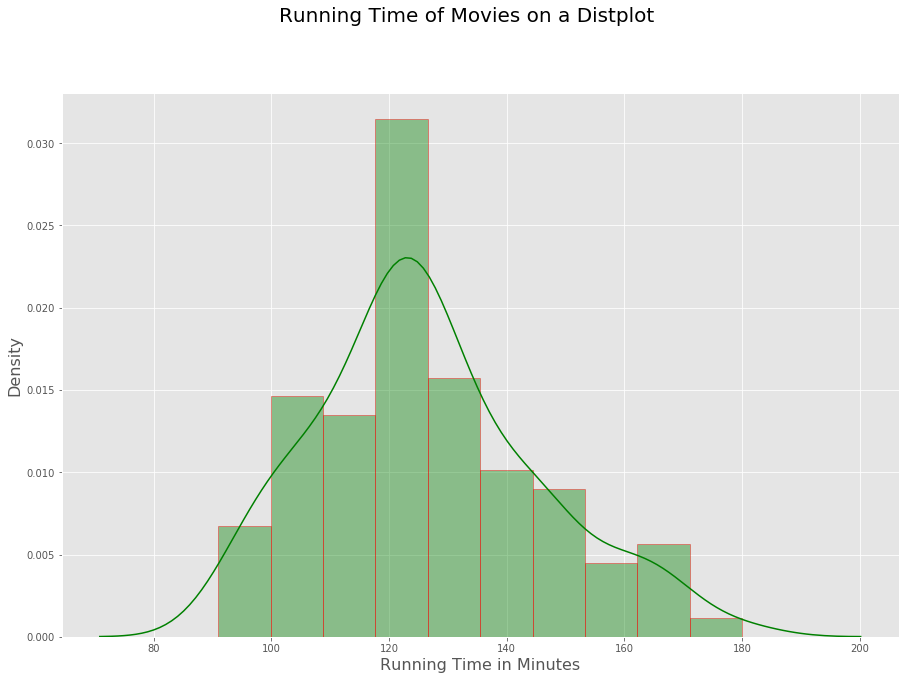

In [29]:
# Runtime histogram/density plot
plt.figure(figsize=(15,10))
plt.style.use("ggplot")
sns.distplot(movies.Runtime, bins=10, color='g',hist_kws=dict(edgecolor="red", linewidth=1))

plt.suptitle('Running Time of Movies on a Distplot', x=0.5, y=1, fontsize=20)
plt.xlabel('Running Time in Minutes', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.show()

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. <br><br>Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [30]:
# Re-setting the Index of the Database
movies.reset_index(inplace=True, drop=True)

In [31]:
movies.content_rating.unique()

array(['R', 'PG', 'G', 'PG-13'], dtype=object)

In [32]:
R_rated_movies = movies[movies.content_rating=='R']

In [33]:
R_rated_movies.sort_values(by='CVotesU18', inplace=True, ascending=False)

In [34]:
R_rated_movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,Avg_rating,total_facebook_likes
82,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25,17166.0
46,The Wolf of Wall Street,2013,100.0,116.866727,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,...,7.6,7.5,7.8,8.1,8.1,R,USA,16.866727,7.85,44000.0
18,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25,40265.0
12,Mad Max: Fury Road,2015,150.0,153.629485,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,...,7.5,7.2,8.0,8.2,8.0,R,Australia,3.629485,8.55,36943.0
9,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65,25505.0


**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

 According to the data, Deadpool is the 'R' rated movie with most votes from people under the 18 Category. So it is suffice to say that kids are really watching it a lot. Other movies that kids are watching are - 'The Wolf of the Wall Street', 
 'Django Unchained', 'Mad Max: Fury Road', etc.

<br><br><br><br>

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

In [35]:
movies[['Title', 'genre_1', 'genre_2', 'genre_3']].head()

,Title,genre_1,genre_2,genre_3
0,Boyhood,Drama,NaN,NaN
1,12 Years a Slave,Biography,Drama,History
2,Inside Out,Animation,Adventure,Comedy
3,Toy Story 3,Animation,Adventure,Comedy
4,Manchester by the Sea,Drama,NaN,NaN


In [36]:
movies.genre_1.unique()

array(['Drama', 'Biography', 'Animation', 'Comedy', 'Crime', 'Action',
       'Adventure', 'Mystery'], dtype=object)

In [37]:
movies.genre_2.nunique()

19

<br><br><br>
-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [38]:
# Create the dataframe df_by_genre
column_names_list = list(movies.columns[11:14])+list(movies.columns[16:60])
df_by_genre = movies.loc[:,column_names_list]

In [39]:
df_by_genre.head()

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
0,Drama,NaN,NaN,49673,62055,76838,52238,23789,10431,4906,...,7.8,7.8,7.8,7.6,7.7,7.7,7.7,7.2,8.0,7.9
1,Biography,Drama,History,75556,126223,161460,83070,27231,9603,4021,...,8.2,8.0,7.9,8.0,7.8,7.8,8.1,7.7,8.3,8.0
2,Animation,Adventure,Comedy,87509,113244,119801,67153,24210,8542,3349,...,8.3,8.1,8.1,8.1,7.9,7.9,7.9,7.6,8.2,8.1
3,Animation,Adventure,Comedy,139773,149992,158704,88289,31291,11850,4859,...,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3
4,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,...,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8


In [40]:
# Create a column cnt and initialize it to 1
df_by_genre['cnt']=1

In [41]:
# Group the movies by individual genres
df_genre_1 = df_by_genre.groupby('genre_1')
df_genre_2 = df_by_genre.groupby('genre_2')
df_genre_3 = df_by_genre.groupby('genre_3')

df_genre_1 = pd.DataFrame(df_genre_1.sum())
df_genre_2 = pd.DataFrame(df_genre_2.sum())
df_genre_3 = pd.DataFrame(df_genre_3.sum())

In [42]:
# Add the grouped data frames and store it in a new data frame
temp = df_genre_1.add(df_genre_2, fill_value=0)
df_add = temp.add(df_genre_3, fill_value=0)

In [43]:
# Extract genres with atleast 10 occurences
genre_top10 = df_add[df_add['cnt']>=10]

In [44]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Romance,549959.0,689492.0,1069280.0,712841.0,281289.0,110901.0,48913.0,27698.0,19200.0,40075.0,...,98.9,98.9,99.6,97.8,97.5,98.9,89.9,101.8,100.1,13.0
Sci-Fi,2325284.0,2530855.0,3002994.0,1802098.0,671811.0,254175.0,111925.0,65904.0,46171.0,114435.0,...,133.6,133.5,133.2,131.1,130.8,131.5,127.9,137.5,134.0,17.0
Thriller,1081701.0,1465491.0,1993378.0,1175799.0,416046.0,149953.0,65281.0,37940.0,25767.0,57630.0,...,100.6,100.7,100.1,99.6,99.3,100.7,96.2,103.1,101.5,13.0


In [45]:
# Take the mean for every column by dividing with cnt 
count_column = genre_top10['cnt']
genre_top10 = genre_top10.div(genre_top10['cnt'], axis='index')

In [46]:
# Rounding off the columns of Votes to two decimals
genre_top10 = genre_top10.apply(lambda x: round(x,2), axis=0)
genre_top10.drop(columns='cnt', inplace=True)

In [47]:
# Converting CVotes to int type
col_cvotes_list = []
for i in genre_top10.columns:
    if i.startswith('CVotes'):
        col_cvotes_list.append(i)
        
genre_top10[col_cvotes_list] = genre_top10[col_cvotes_list].astype('int')

In [48]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,8.00,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,8.09,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,8.20,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.93,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.95,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.76,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,7.92,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,7.91,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,8.04,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,7.88,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81


If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

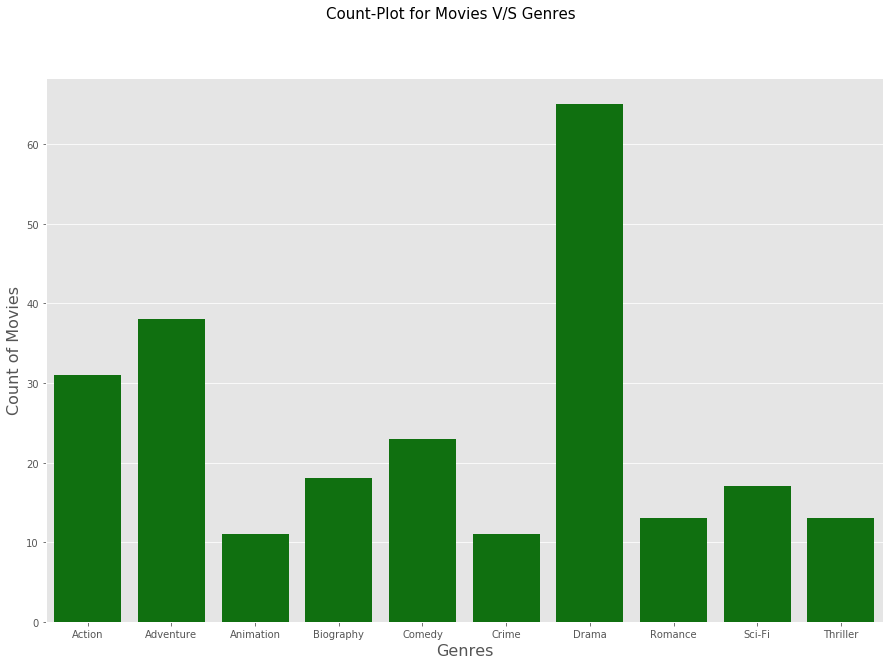

In [49]:
# Countplot for genres
cnt = count_column.tolist()
genre_top10['cnt'] = cnt

plt.figure(figsize=(15,10))
sns.barplot(genre_top10.index, genre_top10.cnt, color='green')

plt.suptitle('Count-Plot for Movies V/S Genres', fontsize=15)
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Count of Movies', fontsize=16)

plt.show()

**`Checkpoint 5:`** Is the bar for `Drama` the tallest?

**Yes the bar for the Drama is the tallest followed by Adventure and then Action**


-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

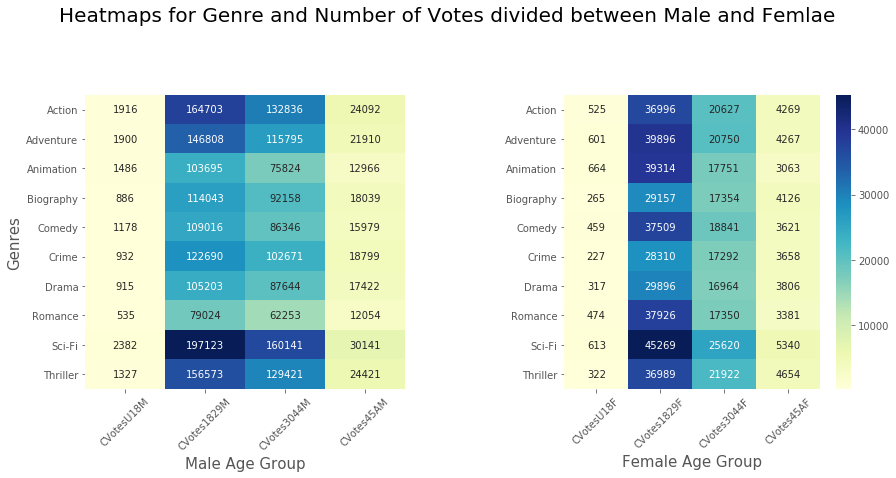

In [50]:
# 1st set of heat maps for CVotes-related columns
male_cvote_genres = genre_top10.groupby(genre_top10.index)['CVotesU18M','CVotes1829M','CVotes3044M','CVotes45AM'].mean()
female_cvote_genres = genre_top10.groupby(genre_top10.index)['CVotesU18F','CVotes1829F','CVotes3044F','CVotes45AF'].mean()

fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(15,8))


f1 = sns.heatmap(male_cvote_genres,cmap="YlGnBu", annot=True, fmt='d',cbar=False,ax=ax1)
f1.set_ylabel('Genres', fontsize=15)
f1.set_xlabel('Male Age Group', fontsize=15)

f2 = sns.heatmap(female_cvote_genres,cmap="YlGnBu", annot=True, fmt='d',cbar=True, ax=ax2)
f2.set_xlabel('Female Age Group', fontsize=15)

for tick in ax1.get_xticklabels():
     tick.set_rotation(45)
        
for tick in ax2.get_xticklabels():
     tick.set_rotation(45)

plt.suptitle('Heatmaps for Genre and Number of Votes divided between Male and Femlae', fontsize=20)
plt.tight_layout(pad=10)
plt.show()


**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:

- Inference 1: **Age group "under 18" and "above 45" have voted more than the age group between "18 to 44", irrespective of their gender.**
- Inference 2: **Romance is the least rated category as voted by men irrespective of their gender, while for females it is not the case.**
- Inference 3: **Apart from Sci-fi, which is liked by both genders irrecpective of their ages, adults i.e. age category 45 and above also voted a lot of Action, Adventure and Thriller movies.**

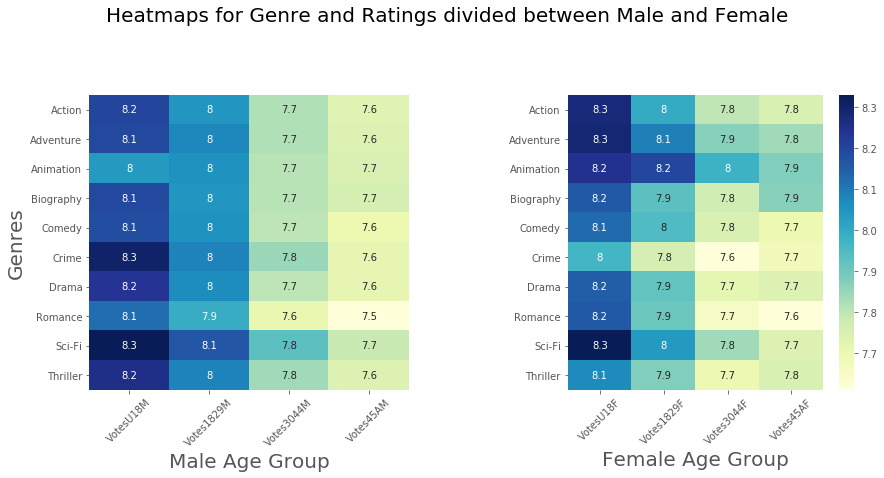

In [51]:
# 2nd set of heat maps for Votes-related columns
male_vote_genres = genre_top10.groupby(genre_top10.index)['VotesU18M','Votes1829M','Votes3044M','Votes45AM'].mean()
female_vote_genres = genre_top10.groupby(genre_top10.index)['VotesU18F','Votes1829F','Votes3044F','Votes45AF'].mean()

fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(15,8))


f1 = sns.heatmap(male_vote_genres,cmap="YlGnBu", annot=True,cbar=False,ax=ax1)
f1.set_ylabel('Genres', fontsize=20)
f1.set_xlabel('Male Age Group', fontsize=20)

f2 = sns.heatmap(female_vote_genres,cmap="YlGnBu", annot=True,cbar=True, ax=ax2)
f2.set_xlabel('Female Age Group', fontsize=20)

for tick in ax1.get_xticklabels():
     tick.set_rotation(45)
        
for tick in ax2.get_xticklabels():
     tick.set_rotation(45)

plt.suptitle('Heatmaps for Genre and Ratings divided between Male and Female', fontsize=20)

plt.tight_layout(pad=10)
plt.show()



**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1: **Even though the average number of votes for romance is less by male the average rating is more or less same as females. This means romance movies, in general, are watched less or voted less by males but the movies are good as they are rated well irrespective of gender especially for U18.** 
- Inference 2: **The age category of "45 and above" have given lower ratings for all movie categories, as compared to other age categories irrespective of their genders. This could mean that adults are not easily impressed by a movies.**
- Inference 3: **We also saw that the genre of 'animation' is better rated by females as compared to men, as we can see Animation genres has been voted steadily in Female gender, whereas in the male there is a significant difference (decrease) as age increases.**

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [52]:
# Creating IFUS column
movies['IFUS'] = movies['Country'].apply(lambda x:'USA' if x=='USA' else 'non-USA')

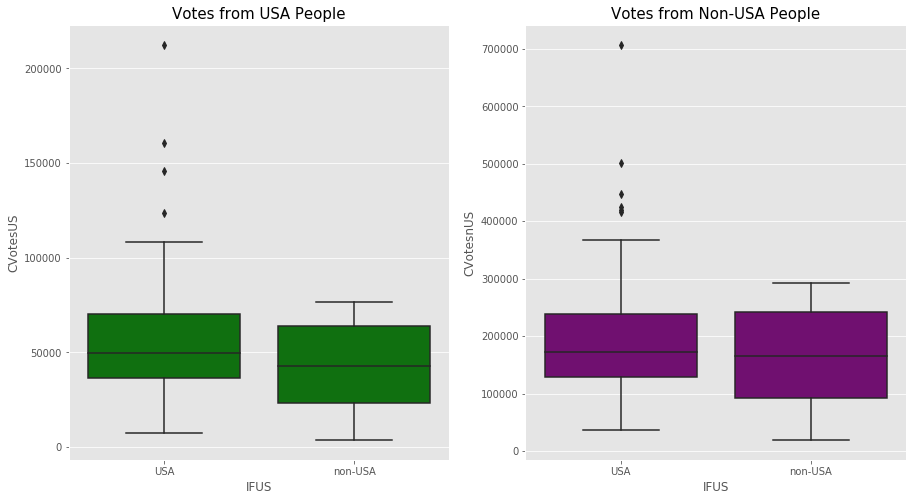

In [53]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)
fig,axes = plt.subplots(ncols=2, figsize=(15,8))
ax1 = axes[0]
ax2 = axes[1]

bp1 = sns.boxplot(x='IFUS', y='CVotesUS', data=movies, ax=ax1, color='green')
bp1.axes.set_title('Votes from USA People', fontsize=15)

bp2 = sns.boxplot(x='IFUS', y='CVotesnUS', data=movies, ax=ax2, color='purple')
bp2.axes.set_title('Votes from Non-USA People', fontsize=15)

plt.show()


**`Inferences:`** Write your two inferences/observations below:
- Inference 1: **Non-US people gave more votes to the movies as compared to the US people on average.**
- Inference 2: **We can find some outliers from the ISA movies**

- Inference 3: **USA movies got higher number of votes from both USA and Non-USA voters as compared to Non-USA movies.**

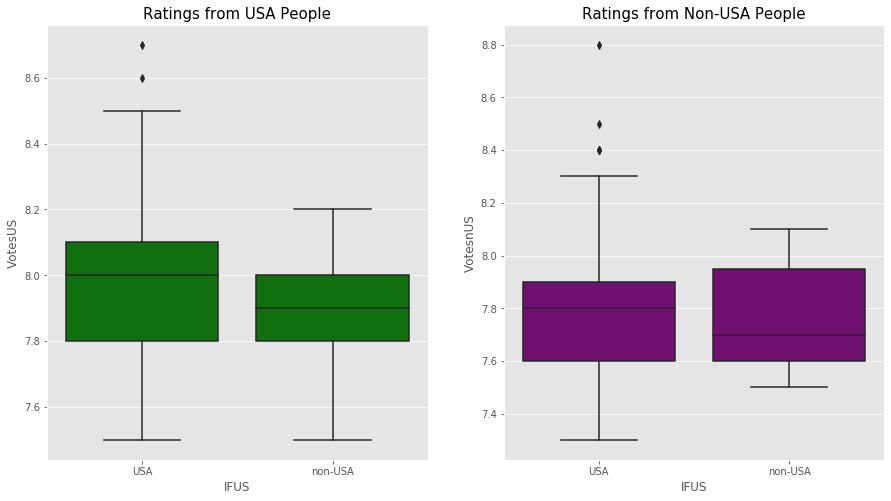

In [54]:
# Box plot - 2: VotesUS(y) vs IFUS(x)
fig,axes = plt.subplots(ncols=2, figsize=(15,8))
ax1 = axes[0]
ax2 = axes[1]

bp1 = sns.boxplot(x='IFUS', y='VotesUS', data=movies, ax=ax1, color='green')
bp1.axes.set_title('Ratings from USA People', fontsize=15)

bp2 = sns.boxplot(x='IFUS', y='VotesnUS', data=movies, ax=ax2, color='purple')
bp2.axes.set_title('Ratings from Non-USA People', fontsize=15)

plt.show()


**`Inferences:`** Write your two inferences/observations below:
- **Inference 1: The median rating is higher from USA people compared to that from non- USA people.**
- **Inference 2: Both USA and non-USA people have rated non-USA movies significantly less than that of USA movies.**

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [55]:
# Sorting by CVotes1000

genre_top10_CVotes = genre_top10.sort_values(by='CVotes1000', ascending=False)

In [56]:
genre_top10_CVotes

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0


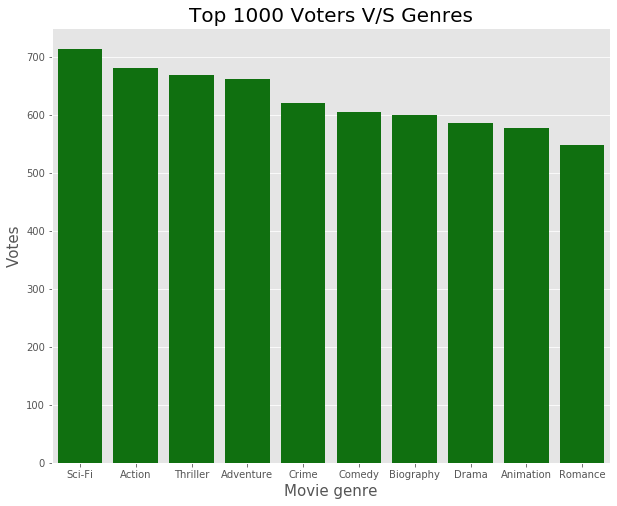

In [57]:
# Bar plot
plt.figure(figsize=(10,8))

sns.barplot(x=genre_top10_CVotes.index, y='CVotes1000', data=genre_top10_CVotes, color='green')
plt.title('Top 1000 Voters V/S Genres', fontsize=20)
plt.xlabel('Movie genre', fontsize=15)
plt.ylabel('Votes', fontsize=15)

plt.show()

**`Inferences:`** Write your inferences/observations here.

- Inference 1 - **Sci-Fi is the most popular movies genre whereas Romance is the least popular genre among the top 1000 voters.**
- Inference 2 - **There is not a significant difference in popularity amongst Action, Thriller and Adventure. This means that these three genres go hand in hand.**

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

--------------------------
--------------------------
--------------------------